## Identity Matrices
An *identity* matrix (usually indicated by a capital ***I***) is the equivalent in matrix terms of the number ***1***. It always has the same number of rows as columns, and it has the value ***1*** in the diagonal element positions I<sub>1 1</sub>, I<sub>2 2</sub>, etc; and 0 in all other element positions. Here's an example of a 3x3 identity matrix:

\begin{equation}\begin{bmatrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{bmatrix} \end{equation}

Multiplying any matrix by an identity matrix is the same as multiplying a number by 1; the result is the same as the original value:

\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\\7 & 8 & 9\end{bmatrix} \cdot \begin{bmatrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{bmatrix} = \begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\\7 & 8 & 9\end{bmatrix} \end{equation}

try the following Python code!

In [7]:
import numpy as np

A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
B = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])
print(A @ B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


## Matrix Division
You can't actually divide by a matrix; but when you want to divide matrices, you can take advantage of the fact that division by a given number is the same as multiplication by the reciprocal of that number. For example:

\begin{equation}6 \div 3 = \frac{1}{3}\times 6 \end{equation}

In this case, <sup>1</sup>/<sub>3</sub> is the reciprocal of 3 (which as a fraction is <sup>3</sup>/<sub>1</sub> - we "flip" the numerator and denominator to get the reciprocal). You can also write <sup>1</sup>/<sub>3</sub> as 3<sup>-1</sup>.

### Inverse of a Matrix

<a href="http://immersivemath.com/ila/ch06_matrices/ch06.html#fig_mtx_inverse_2d_visualization"> Intractive visual of inverse</a>

For matrix division, we use a related idea; we multiply by the *inverse* of a matrix:

\begin{equation}A \div B = A \cdot B^{-1}\end{equation}

The inverse of B is B<sup>-1</sup> as long as the following equation is true:

\begin{equation}B \cdot B^{-1} = B^{-1} \cdot B = I\end{equation}

**I**, you may recall, is an *identity* matrix; the matrix equivalent of 1.

So how do you calculate the inverse of a matrix? For a 2x2 matrix, you can follow this formula:

\begin{equation}\begin{bmatrix}a & b\\c & d\end{bmatrix}^{-1} = \frac{1}{ad-bc}  \begin{bmatrix}d & -b\\-c & a\end{bmatrix}\end{equation}

What happened there?
- We swapped the positions of *a* and *d*
- We changed the signs of *b* and *c*
- We multiplied the resulting matrix by 1 over the *determinant* of the matrix (*ad-bc*)

Let's try with some actual numbers:

\begin{equation}\begin{bmatrix}6 & 2\\1 & 2\end{bmatrix}^{-1} = \frac{1}{(6\times2)-(2\times1)}  \begin{bmatrix}2 & -2\\-1 & 6\end{bmatrix}\end{equation}

So:

\begin{equation}\begin{bmatrix}6 & 2\\1 & 2\end{bmatrix}^{-1} = \frac{1}{10}  \begin{bmatrix}2 & -2\\-1 & 6\end{bmatrix}\end{equation}

Which gives us the result:

\begin{equation}\begin{bmatrix}6 & 2\\1 & 2\end{bmatrix}^{-1} = \begin{bmatrix}0.2 & -0.2\\-0.1 & 0.6\end{bmatrix}\end{equation}

To check this, we can multiply the original matrix by its inverse to see if we get an identity matrix. This makes sense if you think about it; in the same way that 3 x <sup>1</sup>/<sub>3</sub> = 1, a matrix multiplied by its inverse results in an identity matrix:

\begin{equation}\begin{bmatrix}6 & 2\\1 & 2\end{bmatrix} \cdot \begin{bmatrix}0.2 & -0.2\\-0.1 & 0.6\end{bmatrix} = \begin{bmatrix}(6\times0.2)+(2\times-0.1) & (6\times-0.2)+(2\times0.6)\\(1\times0.2)+(2\times-0.1) & (1\times-0.2)+(2\times0.6)\end{bmatrix} = \begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}\end{equation}

Note that not every matrix has an inverse - for example, if the determinant works out to be 0, the inverse matrix is not defined.

In Python, you can use the ***numpy.linalg.inv*** function to get the inverse of a matrix in an *array* or *matrix* object:

In [11]:
import numpy as np

B = np.array([[6,2],
              [1,2]])

print(np.linalg.inv(B))

[[ 0.2 -0.2]
 [-0.1  0.6]]


Additionally, the *matrix* type has an ***I*** method that returns the inverse matrix:

In [12]:
import numpy as np

B = np.matrix([[6,2],
              [1,2]])

print(B.I)

[[ 0.2 -0.2]
 [-0.1  0.6]]


For larger matrices, the process to calculate the inverse is more complex. Let's explore an example based on the following matrix:

\begin{equation}\begin{bmatrix}4 & 2 & 2\\6 & 2 & 4\\2 & 2 & 8\end{bmatrix} \end{equation}

The process to find the inverse consists of the following steps:

1: Create a matrix of *minors* by calculating the *determinant* for each element in the matrix based on the elements that are <u>not</u> in the same row or column; like this:

\begin{equation}\begin{bmatrix}\color{blue}4 & \color{lightgray}2 & \color{lightgray}2\\\color{lightgray}6 & \color{red}2 & \color{red}4\\\color{lightgray}2 & \color{red}2 & \color{red}8\end{bmatrix}\;\;\;\;(2\times8) - (4\times2) = 8\;\;\;\;\begin{bmatrix}8 & \color{lightgray}? & \color{lightgray}?\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\end{bmatrix} \end{equation}

\begin{equation}\begin{bmatrix}\color{lightgray}4 & \color{blue}2 & \color{lightgray}2\\\color{red}6 & \color{lightgray}2 & \color{red}4\\\color{red}2 & \color{lightgray}2 & \color{red}8\end{bmatrix}\;\;\;\;(6\times8) - (4\times2) = 40\;\;\;\;\begin{bmatrix}8 & 40 & \color{lightgray}?\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\end{bmatrix}\end{equation}

\begin{equation}\begin{bmatrix}\color{lightgray}4 & \color{lightgray}2 & \color{blue}2\\\color{red}6 & \color{red}2 & \color{lightgray}4\\\color{red}2 & \color{red}2 & \color{lightgray}8\end{bmatrix}\;\;\;\;(6\times2) - (2\times2) = 8\;\;\;\;\begin{bmatrix}8 & 40 & 8\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\end{bmatrix} \end{equation}

\begin{equation}\begin{bmatrix}\color{lightgray}4 & \color{red}2 & \color{red}2\\\color{blue}6 & \color{lightgray}2 & \color{lightgray}4\\\color{lightgray}2 & \color{red}2 & \color{red}8\end{bmatrix}\;\;\;\;(2\times8) - (2\times2) = 12\;\;\;\;\begin{bmatrix}8 & 40 & 8\\12 & \color{lightgray}? & \color{lightgray}?\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\end{bmatrix} \end{equation}

\begin{equation}\begin{bmatrix}\color{red}4 & \color{lightgray}2 & \color{red}2\\\color{lightgray}6 & \color{blue}2 & \color{lightgray}4\\\color{red}2 & \color{lightgray}2 & \color{red}8\end{bmatrix}\;\;\;\;(4\times8) - (2\times2) = 28\;\;\;\;\begin{bmatrix}8 & 40 & 8\\12 & 28 & \color{lightgray}?\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\end{bmatrix} \end{equation}

\begin{equation}\begin{bmatrix}\color{red}4 & \color{red}2 & \color{lightgray}2\\\color{lightgray}6 & \color{lightgray}2 & \color{blue}4\\\color{red}2 & \color{red}2 & \color{lightgray}8\end{bmatrix}\;\;\;\;(4\times2) - (2\times2) = 4\;\;\;\;\begin{bmatrix}8 & 40 & 8\\12 & 28 & 4\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\end{bmatrix} \end{equation}

\begin{equation}\begin{bmatrix}\color{lightgray}4 & \color{red}2 & \color{red}2\\\color{lightgray}6 & \color{red}2 & \color{red}4\\\color{blue}2 & \color{lightgray}2 & \color{lightgray}8\end{bmatrix}\;\;\;\;(2\times4) - (2\times2) = 4\;\;\;\;\begin{bmatrix}8 & 40 & 8\\12 & 28 & 4\\4 & \color{lightgray}? & \color{lightgray}?\end{bmatrix} \end{equation}

\begin{equation}\begin{bmatrix}\color{red}4 & \color{lightgray}2 & \color{red}2\\\color{red}6 & \color{lightgray}2 & \color{red}4\\\color{lightgray}2 & \color{blue}2 & \color{lightgray}8\end{bmatrix}\;\;\;\;(4\times4) - (2\times6) = 4\;\;\;\;\begin{bmatrix}8 & 40 & 8\\12 & 28 & 4\\4 & 4 & \color{lightgray}?\end{bmatrix} \end{equation}

\begin{equation}\begin{bmatrix}\color{red}4 & \color{red}2 & \color{lightgray}2\\\color{red}6 & \color{red}2 & \color{lightgray}4\\\color{lightgray}2 & \color{lightgray}2 & \color{blue}8\end{bmatrix}\;\;\;\;(4\times2) - (2\times6) = -4\;\;\;\;\begin{bmatrix}8 & 40 & 8\\12 & 28 & 4\\4 & 4 & -4\end{bmatrix} \end{equation}


2: Apply *cofactors* to the matrix by switching the sign of every alternate element in the matrix of minors:

\begin{equation}\begin{bmatrix}8 & -40 & 8\\-12 & 28 & -4\\4 & -4 & -4\end{bmatrix} \end{equation}

3: *Adjugate* by transposing elements diagonally:

\begin{equation}\begin{bmatrix}8 & \color{green}-\color{green}1\color{green}2 & \color{orange}4\\\color{green}-\color{green}4\color{green}0 & 28 & \color{purple}-\color{purple}4\\\color{orange}8 & \color{purple}-\color{purple}4 & -4\end{bmatrix} \end{equation}

4: Multiply by 1/determinant of the original matrix. To find this, multiply each of the top row elements by their corresponding minor determinants (which we calculated earlier in the matrix of minors), and then subtract the second from the first and add the third:

\begin{equation}Determinant = (4 \times 8) - (2 \times 40) + (2 \times 8) = -32\end{equation}


\begin{equation}\frac{1}{-32}\begin{bmatrix}8 & -12 & 4\\-40 & 28 & -4\\8 & -4 & -4\end{bmatrix} =  \begin{bmatrix}-0.25 & 0.375 & -0.125\\1.25 & -0.875 & 0.125\\-0.25 & 0.125 & 0.125\end{bmatrix}\end{equation}

Let's verify that the original matrix multiplied by the inverse results in an identity matrix:

\begin{equation}\begin{bmatrix}4 & 2 & 2\\6 & 2 & 4\\2 & 2 & 8\end{bmatrix} \cdot \begin{bmatrix}-0.25 & 0.375 & -0.125\\1.25 & -0.875 & 0.125\\-0.25 & 0.125 & 0.125\end{bmatrix}\end{equation}

\begin{equation}= \begin{bmatrix}(4\times-0.25)+(2\times1.25)+(2\times-0.25) & (4\times0.375)+(2\times-0.875)+(2\times0.125) & (4\times-0.125)+(2\times-0.125)+(2\times0.125)\\(6\times-0.25)+(2\times1.25)+(4\times-0.25) & (6\times0.375)+(2\times-0.875)+(4\times0.125) & (6\times-0.125)+(2\times-0.125)+(4\times0.125)\\(2\times-0.25)+(2\times1.25)+(8\times-0.25) & (2\times0.375)+(2\times-0.875)+(8\times0.125) & (2\times-0.125)+(2\times-0.125)+(8\times0.125)\end{bmatrix} \end{equation}

\begin{equation}= \begin{bmatrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{bmatrix} \end{equation}

As you can see, this can get pretty complicated - which is why we usually use a calculator or a computer program. You can run the following Python code to verify that the inverse matrix we calculated is correct:

In [15]:
# Here is the inverse of the above explained example-- in python

a=np.array([[4,2,2],
           [6,2,4],
           [2,2,8]])
np.linalg.inv(a)

array([[-0.25 ,  0.375, -0.125],
       [ 1.25 , -0.875,  0.125],
       [-0.25 ,  0.125,  0.125]])

In [10]:
import numpy as np
A = np.array([[1,2,3],[1,3,4],[1,2,5]])
Ainv = np.array([[3.5, -2, -0.5],[-0.5,1,-0.5],[-0.5,0,0.5]])
print(np.linalg.inv(A))
np.dot(A,Ainv)

[[ 3.5 -2.  -0.5]
 [-0.5  1.  -0.5]
 [-0.5  0.   0.5]]


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Multiplying by an Inverse Matrix
Now that you know how to calculate an inverse matrix, you can use that knowledge to multiply the inverse of a matrix by another matrix as an alternative to division:

\begin{equation}\begin{bmatrix}1 & 2\\3 & 4\end{bmatrix} \cdot \begin{bmatrix}6 & 2\\1 & 2\end{bmatrix}^{-1} \end{equation}

\begin{equation}=\begin{bmatrix}1 & 2\\3 & 4\end{bmatrix} \cdot \begin{bmatrix}0.2 & -0.2\\-0.1 & 0.6\end{bmatrix}  \end{equation}

\begin{equation}=\begin{bmatrix}(1\times0.2)+(2\times-0.1) & (1\times-0.2)+(2\times0.6)\\(3\times0.2)+(4\times-0.1) & (3\times-0.2)+(4\times0.6)\end{bmatrix}\end{equation}

\begin{equation}=\begin{bmatrix}0 & 1\\0.2 & 1.8\end{bmatrix}\end{equation}

Here's the Python code to calculate this:

In [16]:
import numpy as np

A = np.array([[1,2],
              [3,4]])

B = np.array([[6,2],
              [1,2]])


C = A @ np.linalg.inv(B)

print(C)

[[0.  1. ]
 [0.2 1.8]]


[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11022302e-16  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


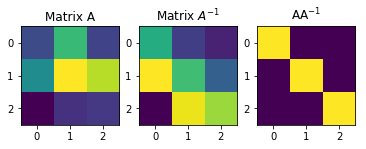

In [5]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

# size of square matrix
m = 3

# generate random matrix
A = np.random.randn(m,m)

# compute its inverse
Ainv = np.linalg.inv(A)

# and check the multiplication
id = A@Ainv

# print the matrix. Note the computer rounding errors on the off-diagonals
print(id)


# show in an image
plt.subplot(131)
plt.imshow(A)
plt.title('Matrix A')

plt.subplot(132)
plt.imshow(Ainv)
plt.title('Matrix $A^{-1}$')

plt.subplot(133)
plt.imshow(id)
plt.title('AA$^{-1}$')

plt.show()

## Column Space-
Defination--
The column space of a matrix A is the span (set of all possible linear combinations) of its column vectors.

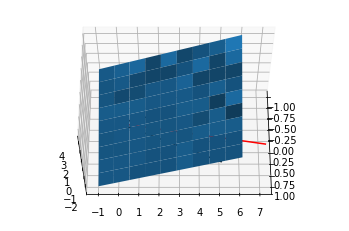

In [6]:
## Visual of column space-- (taken fron an udemy course)
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D # for 3d polting
# matrix A
S = np.array( [ [1,0], [5,2], [1,1] ] )

# vector v
v = np.array([[1], [7], [3]])


fig = plt.figure()
ax = fig.gca(projection='3d')

# draw plane corresponding to the column space
xx, yy = np.meshgrid(np.linspace(-1,1,10),np.linspace(-1,6,10))
cp = np.cross(S[:,0],S[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)/cp[2]
ax.plot_surface(xx,yy,z1)


## plot the two vectors from matrix S
ax.plot([0, S[0,0]],[0, S[1,0]],[0, S[2,0]],'k')
ax.plot([0, S[0,1]],[0, S[1,1]],[0, S[2,1]],'k')

# and the vector v
ax.plot([0, v[0]],[0, v[1]],[0, v[2]],'r')


ax.view_init(elev=60,azim=0)
plt.show()


# Null Space--

Definition: 
***A*** - is any matrix, ***N(A)*** is null space of A defined as--
$N(\mathbf{A})$ is the set of all vectors $\{ \mathbf{v} \}$ such that $\mathbf{A v = 0}$ and $\mathbf{v \neq 0}$   

If any vector on transformation (with matrix A) transformed as a line or point (or plane in case of 3-D), then the set of all possible such vectors are called Null Space.

In 2D -- Null space would be either a point or line.

In 3D -- Null space may be line or plane.

In case of higher dimension null space may be hyperplane.

#### Refrence-
<a href = "https://www.youtube.com/watch?v=uQhTuRlWMxw&list=PL_w8oSr1JpVCZ5pKXHKz6PkjGCbPbSBYv&index=8">Inverse matrices, column space and null space | Essence of linear algebra </a>